# DAT257x: Reinforcement Learning Explained

## Lab 5: Temporal Difference Learning

### Exercise 5.4: Q-Learning Agent

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.simulation import Experiment

In [2]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [23]:

class QLearningAgent(Agent):
    
    def __init__(self, actions, epsilon=0.01, alpha=0.9, gamma=1):
        super(QLearningAgent, self).__init__(actions)
        
        ## TODO 1
        ## Initialize empty dictionary here
        ## In addition, initialize the value of epsilon, alpha and gamma
        self.qsa={}
        self.epsilon=epsilon
        self.gamma=gamma
        self.alpha=alpha        

    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring  
     
    def getQ(self, state, action):
        return self.qsa.get((state, action), 0.0)
    
    def epsilon_greedy(self,state):
        
        q=[self.qsa.get((state, a), 0.0) for a in self.actions]
        policy=np.ones(len(q),dtype=float)*self.epsilon/len(q)
        best_a=q.index(max(q))
        if q.count(best_a)>1:
            best = [i for i in range(len(self.actions)) if q[i] == best_a]
            best_a = np.random.choice(best)

        policy[best_a]+=(1.0 - self.epsilon)
       
        return (policy)        
    
    def act(self, state):
        
        stateStr = self.stateToString(state)      
        p = self.epsilon_greedy(stateStr)
        possible_a = self.actions
        i=np.random.choice(np.arange(len(possible_a)), p=p)
        action = self.actions[i]
            
        return action
    
    def learn(self, state1, action1, reward, state2, done):
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        
        prev = self.qsa.get((state1Str, action1), None)
        if prev is None:
            self.qsa[(state1Str, action1)] = reward 
        else:
            best_a= max([self.qsa.get((state2Str, a),0.0) for a in self.actions])
            temp=self.alpha*(reward+self.gamma*(best_a-prev))
            self.qsa[(state1Str, action1)]+=temp
        
        return self.qsa
        
        """
        Q-learning Update:
        Q(s,a) <- Q(s,a) + alpha * (reward + gamma * max(Q(s') - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * (td_target - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * td_delta
        """

<IPython.core.display.Javascript object>


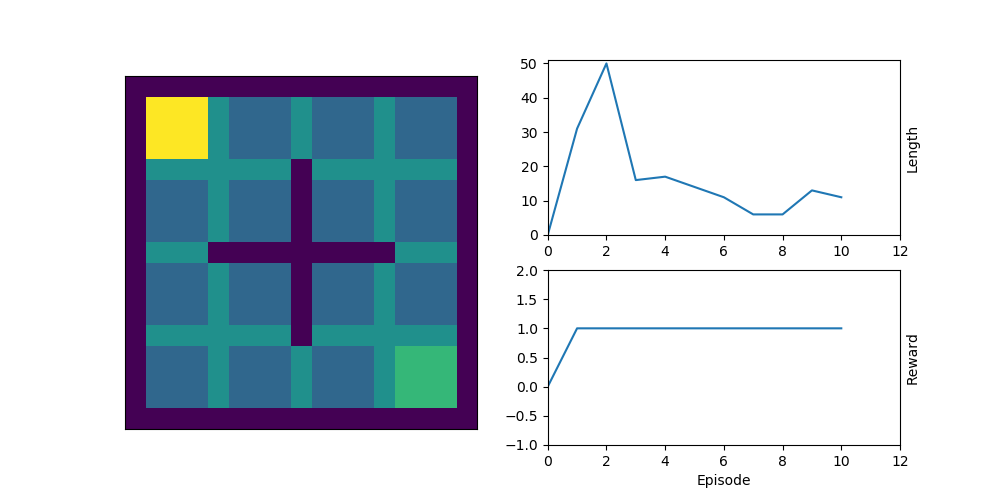

In [24]:
interactive = True
%matplotlib nbagg
env = SimpleRoomsEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(10, interactive)

In [ ]:
interactive = False
%matplotlib inline
env = SimpleRoomsEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(50, interactive)

In [ ]:
interactive = True
%matplotlib nbagg
env = CliffWalkingEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(10, interactive)

In [ ]:
interactive = False
%matplotlib inline
env = CliffWalkingEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(100, interactive)

In [ ]:
interactive = False
%matplotlib inline
env = WindyGridworldEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(50, interactive)